In [ ]:
import os
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


In [19]:
DATA_DIR = join(os.environ['CFS'], 'm3504/oisstv2-daily/subregion-60x60boxes-box_mean_stats')
boxes_fnames = join(DATA_DIR, f"sst.day.mean.box*.nc")  # load all boxes
# boxes_fnames = [join(DATA_DIR, f"sst.day.mean.box{b}.nc") for b in [0,1, 133]]

In [ ]:
def ml_reshape(ds):
    ds = ds.assign_coords(lat=np.arange(ds.sizes['lat']), lon=np.arange(ds.sizes['lon']))
    return ds

ds_box = xr.open_mfdataset(
    boxes_fnames,
    combine='nested', concat_dim='example', preprocess=ml_reshape
).sst


In [20]:
print(ds_box)

<xarray.DataArray 'sst' (example: 101, time: 14894, lat: 60, lon: 60)>
dask.array<concatenate, shape=(101, 14894, 60, 60), dtype=float32, chunksize=(1, 14894, 60, 60), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2022-10-11
  * lat        (lat) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * lon        (lon) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
    dayofyear  (time) int64 dask.array<chunksize=(14894,), meta=np.ndarray>
Dimensions without coordinates: example


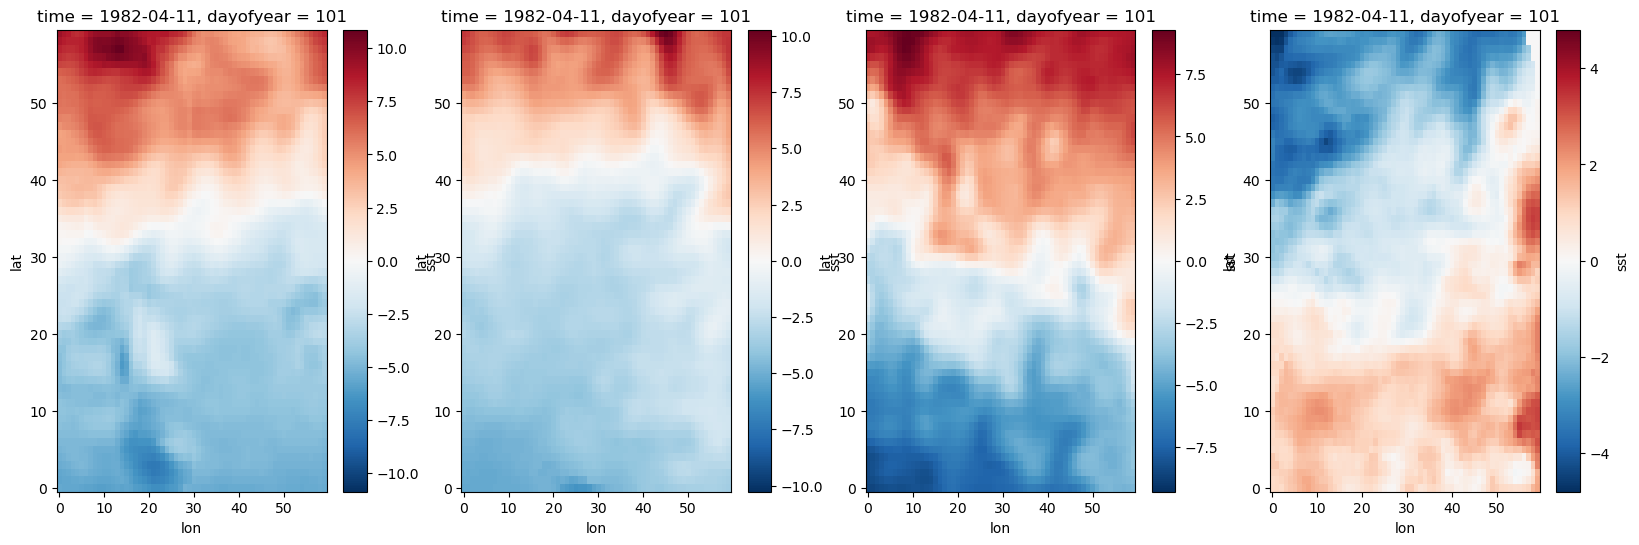

In [21]:
f, ax = plt.subplots(1, 4, figsize=(20, 6))
for i in range(4):
    ds_box.isel(time=100).isel(example=i).plot(ax=ax[i])